In [2]:
import torch
torch.manual_seed(0)

In [3]:
coef = torch.rand((2,1,6)) - 0.5
print(coef)

tensor([[[-0.0037,  0.2682, -0.4115, -0.3680, -0.1926,  0.1341]],

        [[-0.0099,  0.3964, -0.0444,  0.1323, -0.1511, -0.0983]]])


In [4]:
#coef_relu = torch.nn.ReLU()(coef)
coef_relu = torch.abs(coef)
print("coef_relu", coef_relu)


coef_relu tensor([[[0.0037, 0.2682, 0.4115, 0.3680, 0.1926, 0.1341]],

        [[0.0099, 0.3964, 0.0444, 0.1323, 0.1511, 0.0983]]])


In [5]:
coef_relu_cumsum = torch.cumsum(coef_relu, dim=2)
print("coef_relu_cumsum", coef_relu_cumsum)

coef_relu_cumsum tensor([[[0.0037, 0.2720, 0.6835, 1.0515, 1.2440, 1.3781]],

        [[0.0099, 0.4064, 0.4507, 0.5830, 0.7341, 0.8324]]])


0.6180339887498949


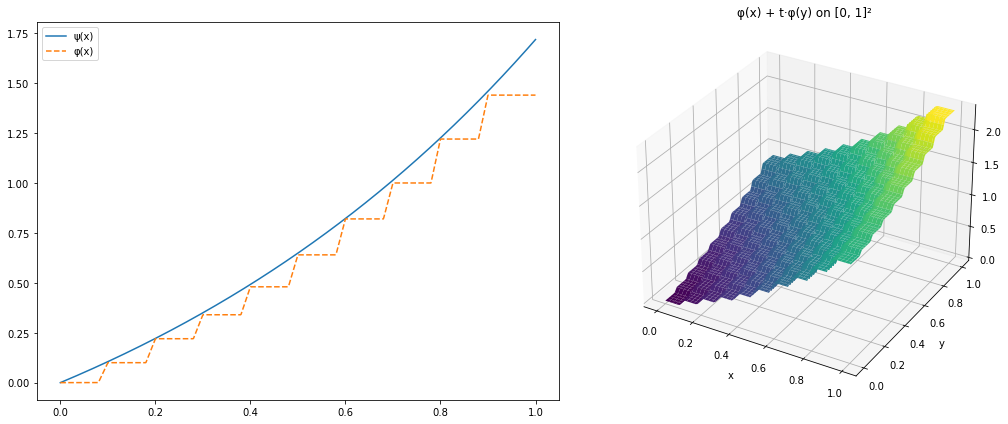

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def psi(x):
    return np.exp(x) - 1

def phi(x, N):
    intervals = np.linspace(0, 1, 5*N+1)
    values = []
    for i in range(N):
        x_min = intervals[5*i]
        x_max = intervals[5*i+4]
        constant_value = np.floor(50 * psi(x_min)) / 50
        values.extend([constant_value] * 5)
    values.append(values[-1])  # Add last value to make it the same length as intervals
    return np.interp(x, intervals, values)
N = 10

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)

# Subplot 1: psi(x) and phi(x)
x = np.linspace(0, 1, 1000)
ax1.plot(x, psi(x), label='ψ(x)')
ax1.plot(x, phi(x, N), label='φ(x)', linestyle='--')
# ax1.set_xlabel('x')
# ax1.set_ylabel('y')
ax1.legend()
# ax1.set_title('ψ(x) and φ(x)')

# Subplot 2: 3D plot of phi(x) + t*phi(y)
x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
t = (np.sqrt(5) - 1) / 2
print(t)
#t=4
Z = phi(X, N) + t * phi(Y, N)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# ax2.set_zlabel('φ(x) + t·φ(y)')
ax2.set_title('φ(x) + t·φ(y) on [0, 1]²')
# remove axes
# ax2.set_axis_off()

plt.tight_layout()
plt.savefig('Kolmogorov-Arnold grid.svg')
plt.show()

$$[ \text{Var}(\epsilon) = \frac{1}{n - p} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 ] $$

$$[ c_i \sim \mathcal{N}(\mu_i, \sigma_i^2) ]$$

$$[ \text{Var}(S(x)) = \text{Var}\left(\sum_{i=0}^{n} c_i B_i(x)\right) ]$$

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i) B_i(x)^2 ]$$

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i) B_i(x)^2 + \sum_{i \neq j} \text{Cov}(c_i, c_j) B_i(x) B_j(x) ]$$

$$[ \mathbb{E}[\text{Var}(S(x))] = \sum_{i=0}^{n} \sigma_i^2 B_i(x)^2 + \sum_{i \neq j} \text{Cov}(c_i, c_j) B_i(x) B_j(x) ]$$

$$[ \mathbb{E}[\text{Var}(S(x))] = \sum_{i=0}^{n} \sigma^2 B_i(x)^2 ]$$

$$[ S(x) = \sum_{i=0}^{n} c_i B_i(x) ]$$

$$[ \text{Var}(S(x)) = \text{Var}\left(\sum_{i=0}^{n} c_i B_i(x)\right) ]$$

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i B_i(x)) ]$$

$$[ \text{Var}(Y) = B_i(x)^2 \text{Var}(c_i) ]$$

$$[ \text{Var}(c_i B_i(x)) = B_i(x)^2 \text{Var}(c_i) = B_i(x)^2 \sigma^2 ]$$

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i B_i(x)) = \sum_{i=0}^{n} B_i(x)^2 \sigma^2 ]$$

$$[ \mathbb{E}[\text{Var}(S(x))] = \sum_{i=0}^{n} \sigma^2 B_i(x)^2 ]$$

$$[ S(x) = \sum_{i=0}^{n} c_i B_i(x) ]$$

$$[ \text{Var}(S(x)) = \text{Var}\left(\sum_{i=0}^{n} c_i B_i(x)\right) ]$$

$$[ \text{Var}(S(x)) = \mathbb{E}[\text{Var}(S(x) \mid x)] + \text{Var}(\mathbb{E}[S(x) \mid x]) ]$$

$$[ \text{Var}(S(x) \mid x) = \sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) ] $$

$$[ \mathbb{E}[S(x) \mid x] = \sum_{i=0}^{n} \mathbb{E}[c_i] B_i(x) ] Let (\mu_i = \mathbb{E}[c_i]), then: [ \mathbb{E}[S(x) \mid x] = \sum_{i=0}^{n} \mu_i B_i(x) ]$$

$$[ \text{Var}(\mathbb{E}[S(x) \mid x]) = \text{Var}\left(\sum_{i=0}^{n} \mu_i B_i(x)\right) ]$$

$$[ \text{Var}(S(x)) = \mathbb{E}\left[\sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) \mid x\right] + \text{Var}\left(\sum_{i=0}^{n} \mu_i B_i(x)\right) ]$$



The expression (\mathbb{E}[\text{Var}(S(x))] = \sum_{i=0}^{n} \sigma^2 B_i(x)^2) arises from the properties of variance in the context of a linear combination of random variables. Let's clarify why (B_i(x)) is squared in this context.
Understanding the Variance of a Linear Combination

When you have a linear combination of random variables, such as:

$$[ S(x) = \sum_{i=0}^{n} c_i B_i(x) ]$$

where (c_i) are random coefficients and (B_i(x)) are deterministic basis functions, the variance of (S(x)) can be expressed as:

$$[ \text{Var}(S(x)) = \text{Var}\left(\sum_{i=0}^{n} c_i B_i(x)\right) ]$$
Variance of a Sum of Random Variables

If the coefficients $(c_i)$ are independent, the variance of the sum can be calculated as:

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i B_i(x)) ]$$

Applying the Variance Property

For a random variable $(Y = c_i B_i(x))$, where $(B_i(x))$ is a constant (deterministic) value, the variance can be computed using the property of variance:

$$[ \text{Var}(Y) = B_i(x)^2 \text{Var}(c_i) ]$$

This is because if $(c_i)$ has variance $(\sigma^2)$, then:

$$[ \text{Var}(c_i B_i(x)) = B_i(x)^2 \text{Var}(c_i) = B_i(x)^2 \sigma^2 ]$$

Summing the Variances

Thus, when you sum the variances for all (i):

$$[ \text{Var}(S(x)) = \sum_{i=0}^{n} \text{Var}(c_i B_i(x)) = \sum_{i=0}^{n} B_i(x)^2 \sigma^2 ]$$

Expected Variance

Taking the expectation of the variance, assuming the coefficients are independent and identically distributed (i.i.d.), leads to:

$$[ \mathbb{E}[\text{Var}(S(x))] = \sum_{i=0}^{n} \sigma^2 B_i(x)^2 ]$$

Conclusion

In summary, the (B_i(x)^2) term appears because we are calculating the variance of the product of a random variable (c_i) and a deterministic function (B_i(x)). The variance of a scaled random variable involves squaring the scaling factor (in this case, (B_i(x))). Thus, the expression correctly reflects how the variance of the spline (S(x)) depends on the values of the basis functions at the point (x).

If (x) is also a random variable, the situation becomes more complex, as we need to consider the joint distribution of both the coefficients $(c_i)$ and the random variable $(x)$. In this case, we need to analyze how the randomness in $(x)$ affects the variance of the B-spline $(S(x))$.

1. B-spline Representation:

The B-spline can still be expressed as: 
$$[ S(x) = \sum_{i=0}^{n} c_i B_i(x) ]$$
where $(c_i)$ are the coefficients (which may be random variables) and $(B_i(x))$ are the B-spline basis functions evaluated at the random variable $(x)$.

2. Variance of $(S(x))$:

To find the variance of $(S(x))$, we need to consider both the variance of the coefficients and the variance introduced by the randomness in $(x)$. The variance of $(S(x))$ can be expressed as: 
$$[ \text{Var}(S(x)) = \text{Var}\left(\sum_{i=0}^{n} c_i B_i(x)\right) ]$$

3. Using the Law of Total Variance:

If $(x)$ is a random variable, we can use the law of total variance: 
$$[ \text{Var}(S(x)) = \mathbb{E}[\text{Var}(S(x) \mid x)] + \text{Var}(\mathbb{E}[S(x) \mid x]) ]$$

a. Conditional Variance:

Given a specific value of $(x)$, the variance of $(S(x))$ can be computed as: 
$$[ \text{Var}(S(x) \mid x) = \sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) ]$$ 
if the coefficients $(c_i)$ are independent.

b. Expected Value:

The expected value of $(S(x))$ given $(x)$ is: 
$$[ \mathbb{E}[S(x) \mid x] = \sum_{i=0}^{n} \mathbb{E}[c_i] B_i(x) ]$$
Let 
$$(\mu_i = \mathbb{E}[c_i])$$ 
, then: 
$$[ \mathbb{E}[S(x) \mid x] = \sum_{i=0}^{n} \mu_i B_i(x) ]$$

4. Variance of the Expected Value:

Now, we need to compute the variance of this expected value: 
$$[ \text{Var}(\mathbb{E}[S(x) \mid x]) = \text{Var}\left(\sum_{i=0}^{n} \mu_i B_i(x)\right) ]$$
This will depend on the distribution of $(x)$ and how $(B_i(x))$ varies with $(x)$.

5. Putting It All Together:

Combining these results, we have: 
$$[ \text{Var}(S(x)) = \mathbb{E}\left[\sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) \mid x\right] + \text{Var}\left(\sum_{i=0}^{n} \mu_i B_i(x)\right) ]$$

Conclusion:

In summary, when both the coefficients $(c_i)$ and the input $(x)$ are random variables, the expected variance of the B-spline $(S(x))$ involves both the conditional variance given $(x)$ and the variance of the expected value of $(S(x))$ given $(x)$. The specific calculations will depend on the distributions of $(c_i)$ and $(x)$, as well as the functional form of the B-spline basis functions $(B_i(x))$.

If you have specific distributions for $(c_i)$ and $(x)$, or if you want to explore a particular case, please provide that information for a more detailed analysis.

Taking this formula:
$$[ \text{Var}(S(x)) = \mathbb{E}\left[\sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) \mid x\right] + \text{Var}\left(\sum_{i=0}^{n} \mu_i B_i(x)\right) ]$$

we know that at initialization the coeffifients (c_i) are 0 or very close to 0. Thus it holds that
$$(\mu_i = \mathbb{E}[c_i] = 0)$$ 

$$[ \text{Var}(S(x)) = \mathbb{E}\left[\sum_{i=0}^{n} B_i(x)^2 \text{Var}(c_i) \mid x\right] + 0]$$

The output range of the B-spline basis functions (B_i(x)) depends on the specific properties of the B-spline and the interval over which it is defined. Here are some key points regarding the output range of B-spline basis functions:

1. Non-negativity:

B-spline basis functions are non-negative for all (x). This means that for any (i) and any (x), the value of (B_i(x)) is always greater than or equal to zero: [ B_i(x) \geq 0 \quad \forall x ]

2. Support:

Each B-spline basis function (B_i(x)) has a specific support, which is the interval over which it is non-zero. For a B-spline of degree (p) with (n) knots, the support of each basis function is typically defined by the knots. Specifically, (B_i(x)) is non-zero only in the interval defined by the (p) knots surrounding it.
3. Sum of Basis Functions:

The sum of all B-spline basis functions for a given (x) is equal to 1: [ \sum_{i=0}^{n} B_i(x) = 1 \quad \forall x ] This property is known as the partition of unity, which ensures that the B-spline representation is well-defined.

4. Output Range:

Given the properties above, the output range of each individual B-spline basis function (B_i(x)) is:

    Minimum: (0)
    Maximum: (1) (at the peak of the basis function, which occurs at the knot associated with that basis function)

5. Example:

For example, consider a cubic B-spline (degree (p = 3)). The basis functions will be piecewise polynomials that are non-negative and will peak at certain values depending on the knots. The exact shape and location of these peaks will depend on the specific knot vector used to define the B-spline.
Conclusion:

In summary, the output range of each B-spline basis function (B_i(x)) is ([0, 1]), and the functions are non-negative and sum to 1 across all basis functions for any given (x). This makes B-splines particularly useful in applications such as interpolation and approximation, where maintaining a bounded and non-negative representation is important.

In [7]:
hidden = [3]*2
width = [2, *hidden, 1]
print(width)

[2, 3, 3, 1]


x [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
y [0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]


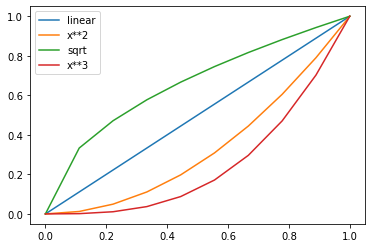

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 10)
y = x**2
y2 = np.sqrt(x)
y3 = x**3

print("x", x)
print("y", y)
plt.plot(x,x, label="linear")
plt.plot(x,y, label="x**2")
plt.plot(x,y2, label="sqrt")
plt.plot(x,y3, label="x**3")
plt.legend()
plt.show()

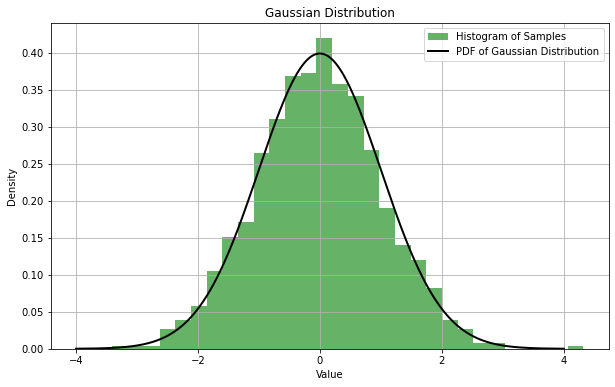

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean = 0      # Mean (center) of the distribution
std_dev = 1   # Standard deviation (spread) of the distribution
size = 1000   # Number of random samples to generate

# Generate random samples from a Gaussian distribution
samples = np.random.normal(loc=mean, scale=std_dev, size=size)

# Create a histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Samples')

# Create an array of x values for the PDF
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the PDF of the Gaussian distribution
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the PDF
plt.plot(x, pdf, 'k', linewidth=2, label='PDF of Gaussian Distribution')

# Add titles and labels
plt.title('Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [37]:
# Define the array


# Value to find
x = 5  # Change this to the value you want to find

# Get the index of x in the array
noises = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
index = [i for i, value in enumerate(noises) if value == x]
index = indices[0] if indices.size > 0 else -1

print(index)

[]


In [3]:
import pandas as pd

# Create df1 with 2 columns and 1 row
df1 = pd.DataFrame({
    'A': [1],
    'B': [2]
})

# Create df2 with 3 columns and 4 rows
df2 = pd.DataFrame({
    'C': [3, 4, 5, 6],
    'D': [7, 8, 9, 10],
    'E': [11, 12, 13, 14]
})

# Repeat df1 to match the number of rows in df2
df1_repeated = pd.concat([df1]*df2.shape[0], ignore_index=True)

# Concatenate horizontally
result_horizontal = pd.concat([df1_repeated, df2], axis=1)
print(result_horizontal)

   A  B  C   D   E
0  1  2  3   7  11
1  1  2  4   8  12
2  1  2  5   9  13
3  1  2  6  10  14


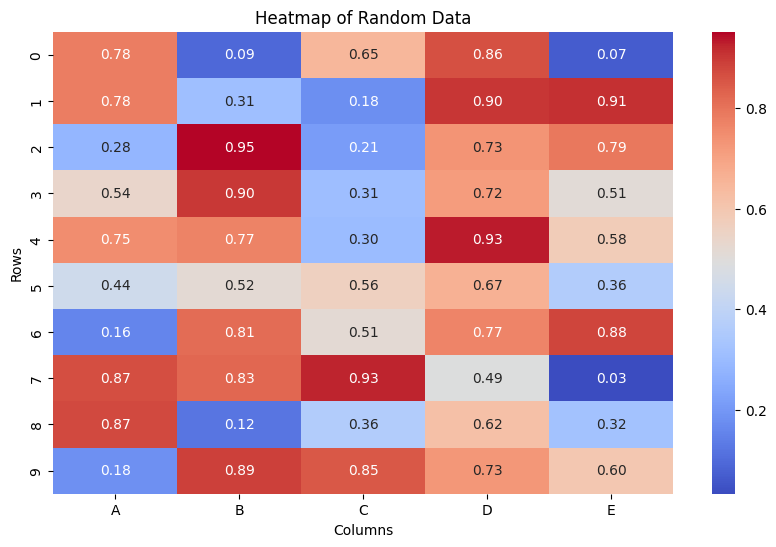

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame
data = np.random.rand(10, 5)  # 10 rows and 5 columns of random numbers
columns = ['A', 'B', 'C', 'D', 'E']
df = pd.DataFrame(data, columns=columns)

# Step 2: Create a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap

# Step 3: Customize the heatmap
plt.title('Heatmap of Random Data')  # Add a title
plt.xlabel('Columns')  # Label for x-axis
plt.ylabel('Rows')  # Label for y-axis

# Step 4: Show the heatmap
plt.show()

In [10]:
import torch

noise_scale=1
in_dim=5
out_dim=5
num = 5
noises = (torch.rand(num+1, in_dim, out_dim) - 1/2) * noise_scale / num
print("noises.var()", noises.var())

noises.var() tensor(0.0035)


To calculate the variance of a B-spline, we first need to clarify what we mean by the variance in this context. B-splines are piecewise polynomial functions defined over a certain interval, and they are typically used in approximation and interpolation tasks. The variance of a function can be interpreted in different ways depending on the context, but one common interpretation is to consider the variance of the function values over a certain interval.

Let's denote the B-spline ( S(x) ) as follows:

$$[ S(x) = \sum_{i=0}^{n} c_i B_i(x) ]$$

where ( c_i ) are the coefficients, ( B_i(x) ) are the B-spline basis functions, and ( n ) is the degree of the spline.
Steps to Calculate Variance

    Define the Interval: Choose an interval ([a, b]) over which you want to calculate the variance of the B-spline.

    Calculate the Mean: The mean value of the B-spline over the interval ([a, b]) is given by:

$$[ \mu = \frac{1}{b-a} \int_a^b S(x) , dx ]$$

    Calculate the Variance: The variance ( \sigma^2 ) of the B-spline over the interval ([a, b]) is given by:

$$[ \sigma^2 = \frac{1}{b-a} \int_a^b (S(x) - \mu)^2 , dx ]$$

This can be expanded as:

$$[ \sigma^2 = \frac{1}{b-a} \left( \int_a^b S(x)^2 , dx - 2\mu \int_a^b S(x) , dx + \mu^2 (b-a) \right) ]$$

Since ( \mu = \frac{1}{b-a} \int_a^b S(x) , dx ), we can substitute this back into the variance formula.
Summary

To compute the variance of the B-spline ( S(x) ):

    Choose the interval ([a, b]).
    Compute the mean ( \mu ) using the integral of ( S(x) ).
    Compute the variance ( \sigma^2 ) using the integral of ( S(x)^2 ) and the mean.

Example

If you have specific coefficients ( c_i ) and basis functions ( B_i(x) ), you can perform the integrals explicitly to find the mean and variance. If you provide specific values or a specific B-spline, I can help you compute the variance step by step.


$$[ f(x) \in [0, 1] ]$$
$$[ \forall x \in D, \quad f(x) \in [0, 1] ]$$

# Idea for a project

- Interactive Spline visualization, where parameters like noise, ws, wb can be visualized
- Probably a web page in js
